Modified Dataset - Train Accuracy: 0.9030
Modified Dataset - Test Accuracy: 0.5682
Misclassified images: 19


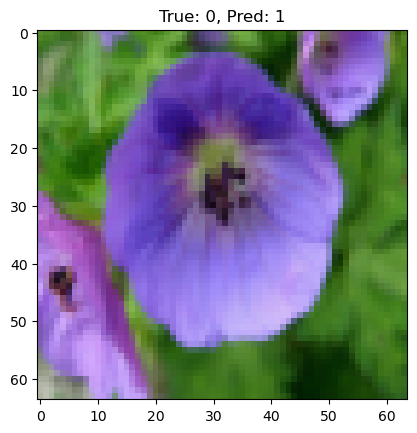

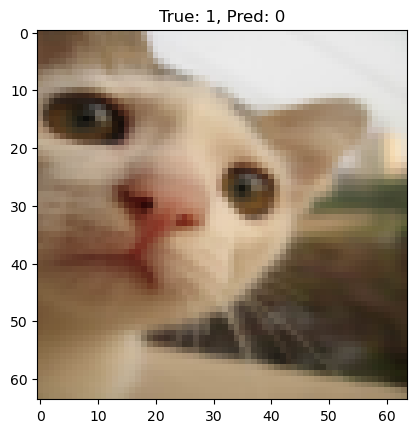

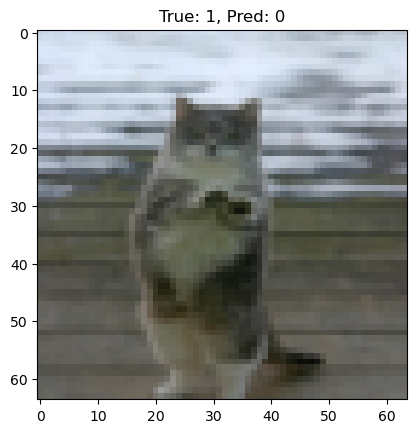

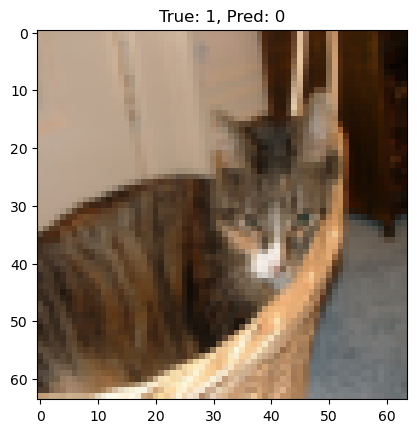

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
def load_dataset(file_path):
    with h5py.File(file_path, 'r') as f:
        X = np.array(f['train_set_x'][:])  # Images
        y = np.array(f['train_set_y'][:])  # Labels
    return X, y

# Preprocess the data (flatten and normalize)
def preprocess_data(X, y):
    X = X / 255.0  # Normalize
    X = X.reshape(X.shape[0], -1)  # Flatten
    y = np.where(y == 1, 1, 0)  # Ensure binary labels
    return X, y

# Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for _ in range(self.num_iterations):
            predictions = self.sigmoid(np.dot(X, self.theta))
            error = predictions - y
            gradient = (1 / m) * np.dot(X.T, error)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)

    def accuracy(self, X, y):
        return np.mean(self.predict(X) == y)

# Display misclassified images
def display_misclassified_images(X, y, model, misclassified_indices):
    for idx in misclassified_indices[:4]:
        plt.imshow(X[idx].reshape(64, 64, 3))
        plt.title(f"True: {y[idx]}, Pred: {model.predict(X[idx].reshape(1, -1))[0]}")
        plt.show()

# Train and evaluate model
def train_and_evaluate(X_train, y_train, X_test, y_test, modified):
    model = LogisticRegression(learning_rate=0.001, num_iterations=1000)
    model.fit(X_train, y_train)

    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    print(f"{'Modified' if modified else 'Original'} Dataset - Train Accuracy: {train_acc:.4f}")
    print(f"{'Modified' if modified else 'Original'} Dataset - Test Accuracy: {test_acc:.4f}")

    misclassified_indices = np.where(model.predict(X_test) != y_test)[0]
    print(f"Misclassified images: {len(misclassified_indices)}")
    display_misclassified_images(X_test, y_test, model, misclassified_indices)

# Main program
if __name__ == "__main__":
    file_path = 'train_catvnoncat.h5'
    X, y = load_dataset(file_path)
    X, y = preprocess_data(X, y)

    # Deterministic split using the student ID's last digit
    student_id_last_digit = 5  # Replace with actual last digit
    num_train = 160 + student_id_last_digit  # Define the training set size

    # Split dataset based on student ID
    X_train = X[:num_train]
    y_train = y[:num_train]
    X_test = X[num_train:]
    y_test = y[num_train:]

    # Train and evaluate on the modified dataset
    train_and_evaluate(X_train, y_train, X_test, y_test, modified=True)